In [30]:
import cv2 as cv

In [31]:
import matplotlib.pyplot as plt


In [32]:
image = cv.imread('Documents/SEM 2/RL/img1.jpg')

In [33]:
# image -> grayscale
image_gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

In [34]:
#resizing
image_resized  = cv.resize(image_gray,(256,256))

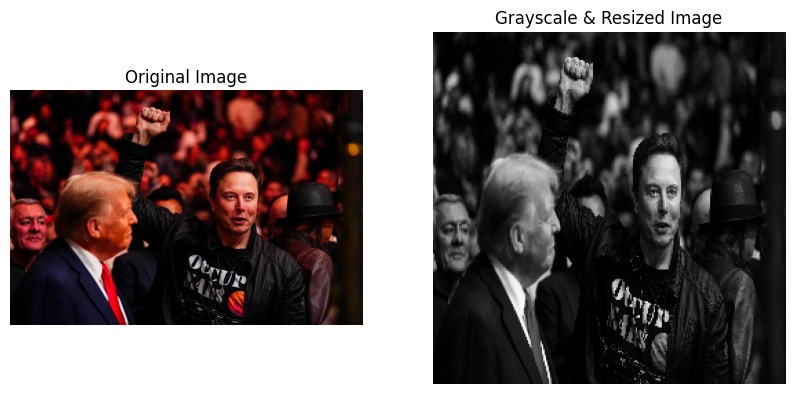

In [35]:
#original and preprocessed images
plt.figure(figsize=(10, 5))

#original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

#preprocessed image
plt.subplot(1, 2, 2)
plt.imshow(image_resized, cmap='gray')
plt.title('Grayscale & Resized Image')
plt.axis('off')

plt.show()

In [36]:
import numpy as np

In [37]:
# log transformation
log_image = np.uint8(255*(np.log1p(image_gray) / np.log1p(np.max(image_gray))))
# Power-Law (Gamma) Transformation
gamma = 2.0  # Experiment with values <1 (brighten) or >1 (darken)
gamma_corrected = np.uint8(255 * ((image_gray / 255) ** gamma))

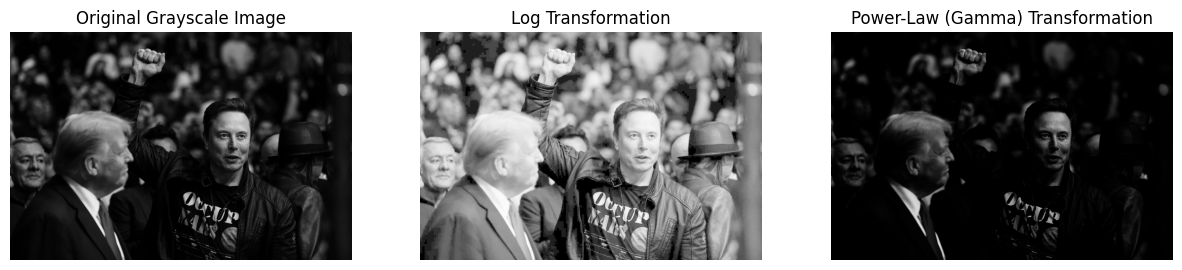

In [38]:
#results
plt.figure(figsize=(15, 5))

# Original grayscale image
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

#log transformed image
plt.subplot(1, 3, 2)
plt.imshow(log_image, cmap='gray')
plt.title('Log Transformation')
plt.axis('off')

#gamma corrected image
plt.subplot(1, 3, 3)
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Power-Law (Gamma) Transformation')
plt.axis('off')

plt.show()

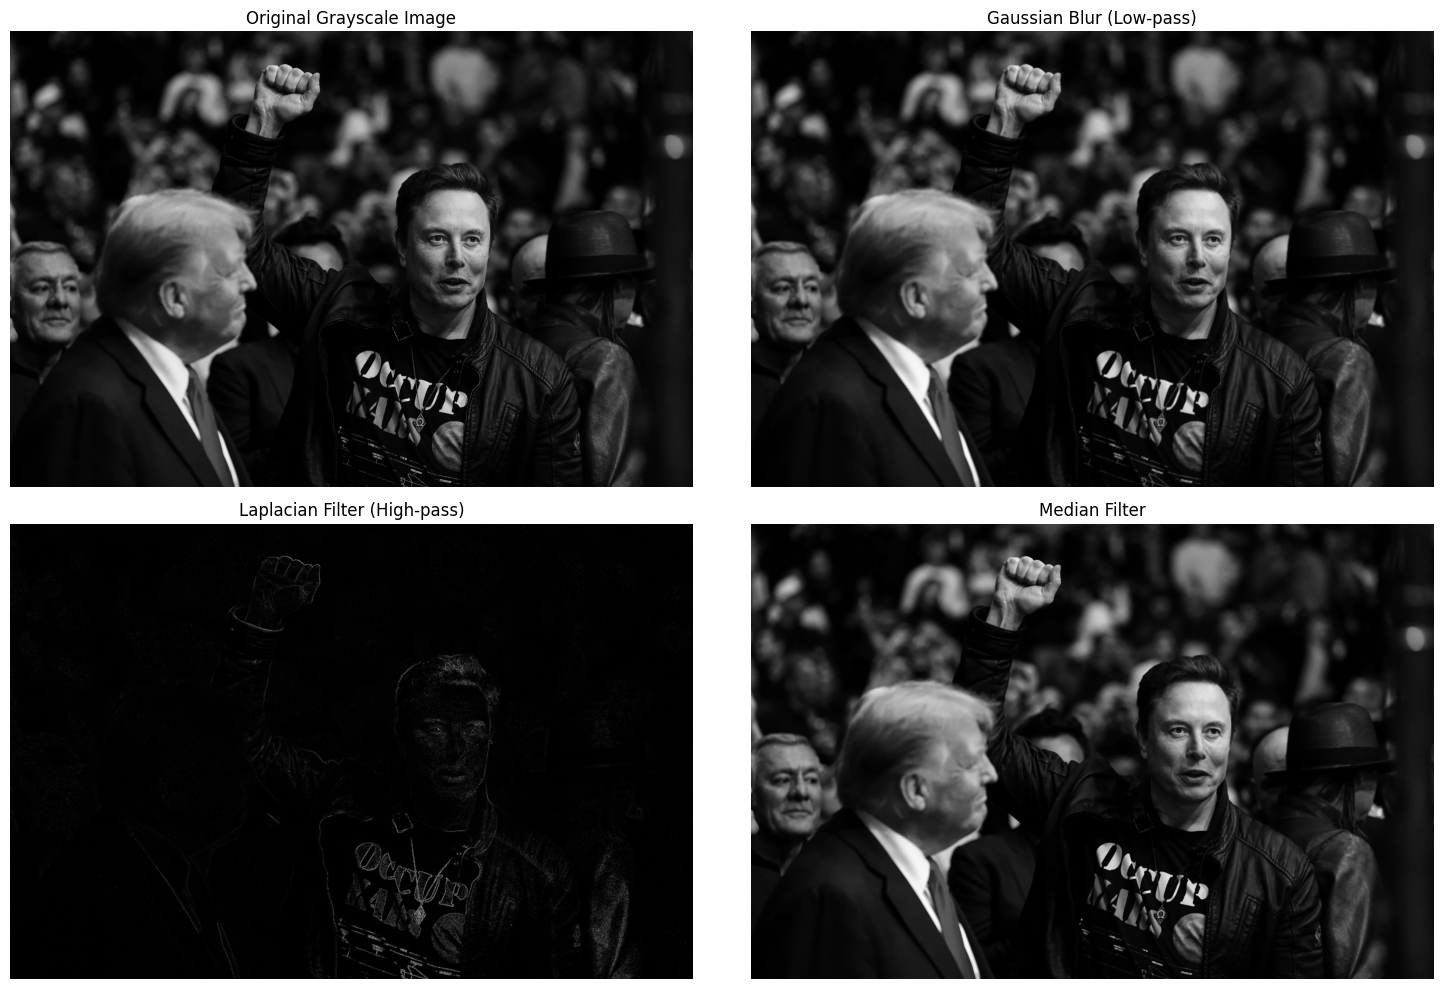

In [39]:
#Gaussian filter (Low-pass filter)
gaussian_blur = cv2.GaussianBlur(image_gray, (7, 7), 0)

#Laplacian filter (High-pass filter)
laplacian = cv2.Laplacian(image_gray, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))  # Convert to uint8 for visualization

#Median filter
median_blur = cv2.medianBlur(image_gray, 5)

#results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Gaussian Blur
plt.subplot(2, 2, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur (Low-pass)')
plt.axis('off')

# Laplacian Filter
plt.subplot(2, 2, 3)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Filter (High-pass)')
plt.axis('off')

# Median Filter
plt.subplot(2, 2, 4)
plt.imshow(median_blur, cmap='gray')
plt.title('Median Filter')
plt.axis('off')

plt.tight_layout()
plt.show()


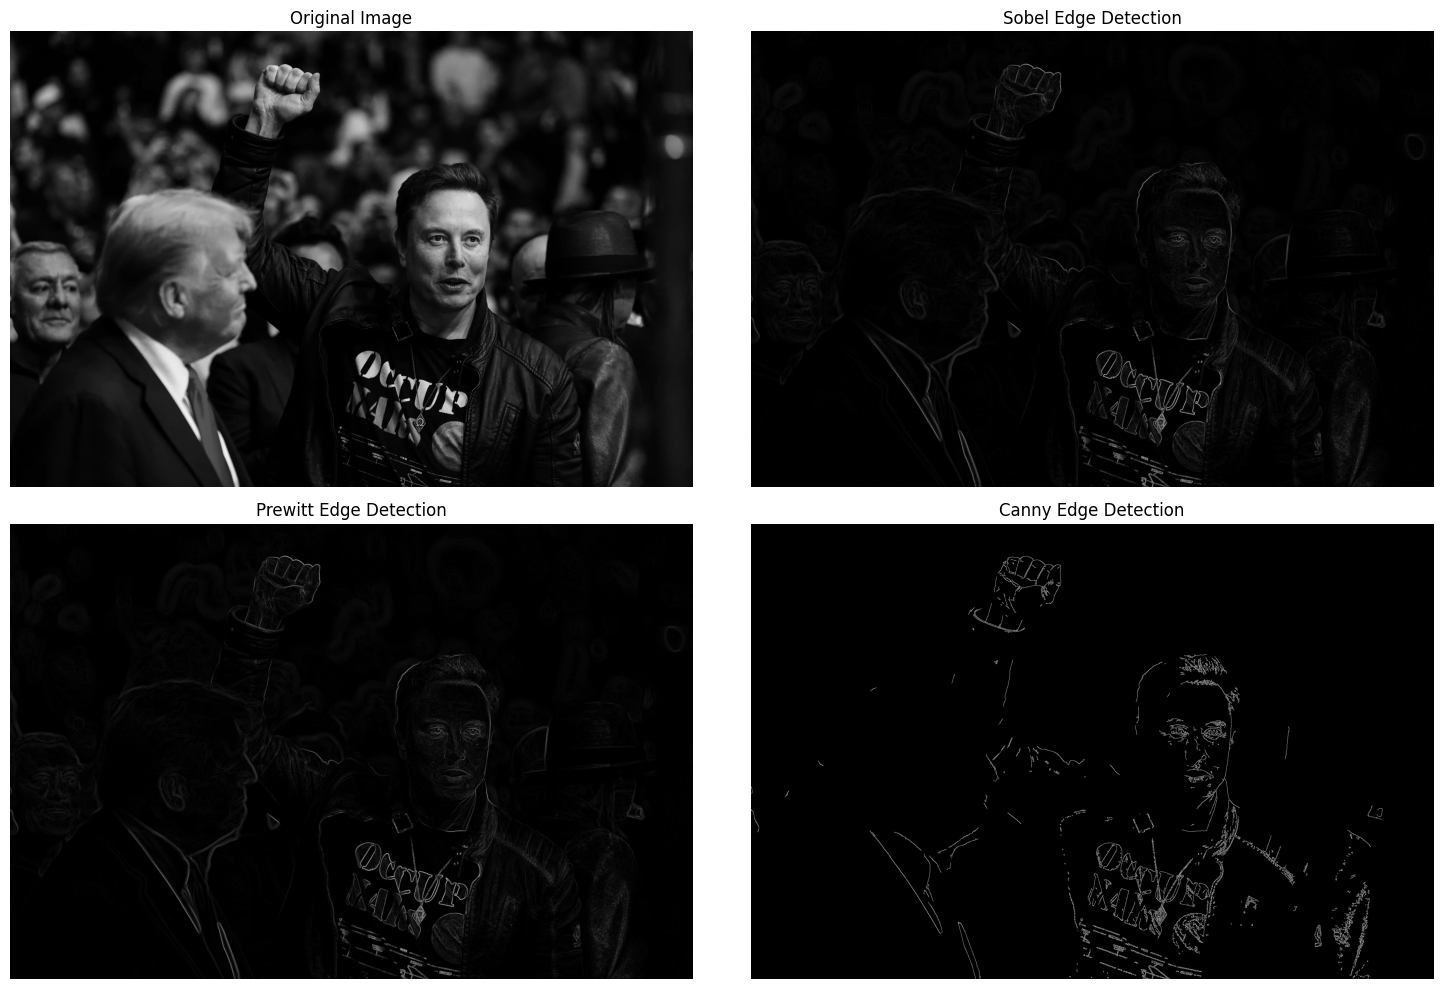

In [40]:
# Sobel Edge Detection
sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Prewitt Edge Detection (Custom implementation)
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # Horizontal kernel
kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Vertical kernel
prewitt_x = cv2.filter2D(image_gray, cv2.CV_64F, kernel_x)  # Convert to float64
prewitt_y = cv2.filter2D(image_gray, cv2.CV_64F, kernel_y)  # Convert to float64
prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)

# Canny Edge Detection
canny_edges = cv2.Canny(image_gray, 100, 200)

# Display 
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Sobel combined edges
plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

# Prewitt combined edges
plt.subplot(2, 2, 3)
plt.imshow(prewitt_combined, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

# Canny edges
plt.subplot(2, 2, 4)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


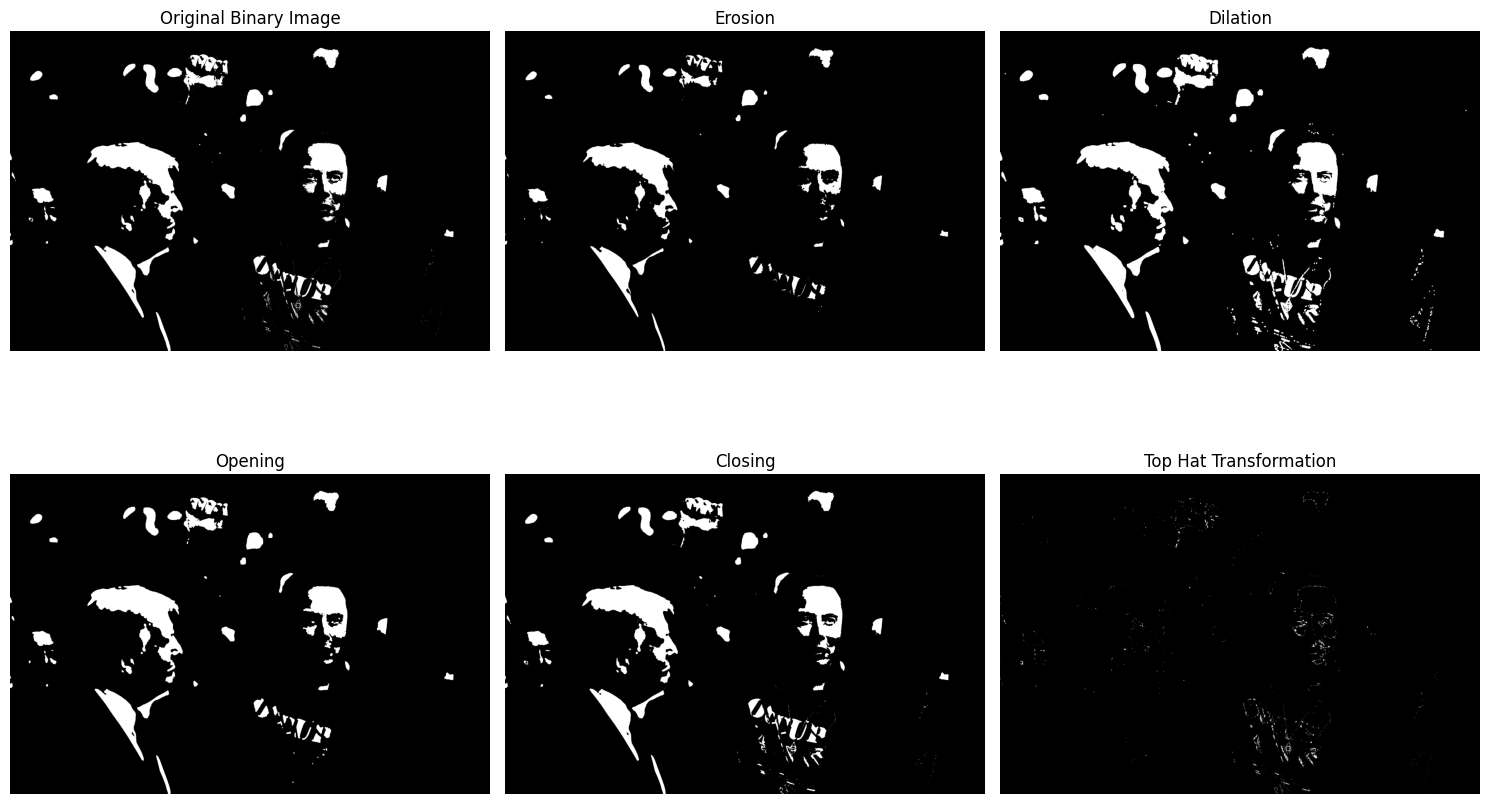

In [41]:
#  convert it to binary
_, binary_image = cv2.threshold(image_gray, 128, 255, cv2.THRESH_BINARY)  # Binarization using thresholding

#structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  # Rectangular kernel of size 5x5

# Erosion
eroded = cv2.erode(binary_image, kernel, iterations=1)

# Dilation
dilated = cv2.dilate(binary_image, kernel, iterations=1)

# Opening (Erosion followed by Dilation)
opened = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Closing (Dilation followed by Erosion)
closed = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Top Hat Transformation
top_hat = cv2.morphologyEx(binary_image, cv2.MORPH_TOPHAT, kernel)

# Bottom Hat Transformation
bottom_hat = cv2.morphologyEx(binary_image, cv2.MORPH_BLACKHAT, kernel)

#results
plt.figure(figsize=(15, 10))

# Original binary image
plt.subplot(2, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

# Erosion
plt.subplot(2, 3, 2)
plt.imshow(eroded, cmap='gray')
plt.title('Erosion')
plt.axis('off')

# Dilation
plt.subplot(2, 3, 3)
plt.imshow(dilated, cmap='gray')
plt.title('Dilation')
plt.axis('off')

# Opening
plt.subplot(2, 3, 4)
plt.imshow(opened, cmap='gray')
plt.title('Opening')
plt.axis('off')

# Closing
plt.subplot(2, 3, 5)
plt.imshow(closed, cmap='gray')
plt.title('Closing')
plt.axis('off')

# Top Hat
plt.subplot(2, 3, 6)
plt.imshow(top_hat, cmap='gray')
plt.title('Top Hat Transformation')
plt.axis('off')

plt.tight_layout()
plt.show()


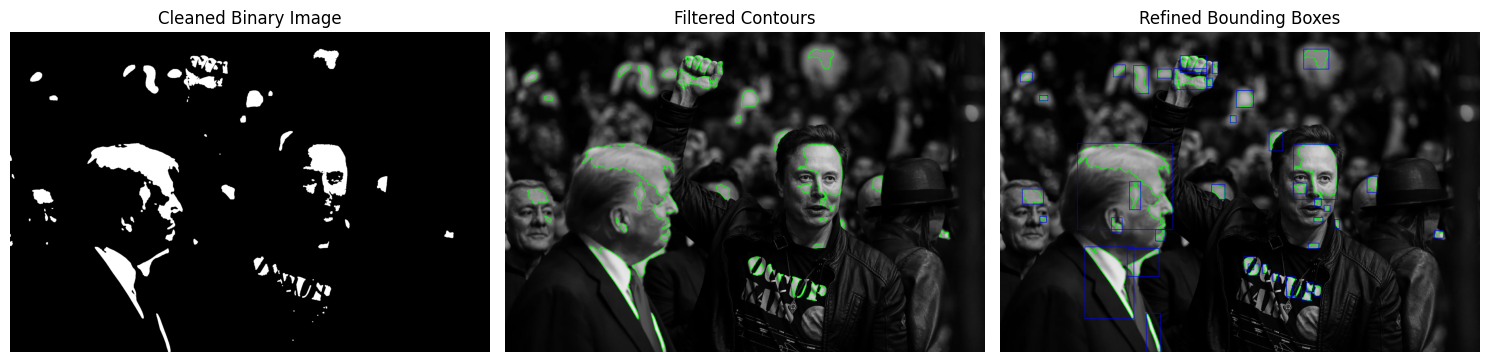

In [42]:
#morphological opening to clean up noise
cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

#contours on the cleaned image
contours, hierarchy = cv2.findContours(cleaned_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#filtering contours based on area
min_contour_area = 500  
filtered_contours = [contour for contour in contours if cv2.contourArea(contour) > min_contour_area]

# drawing filtered contours and bounding boxes
image_contours_filtered = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_contours_filtered, filtered_contours, -1, (0, 255, 0), 2)

image_boxes_filtered = image_contours_filtered.copy()
for contour in filtered_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image_boxes_filtered, (x, y), (x + w, y + h), (255, 0, 0), 2)

# displaying refined results
plt.figure(figsize=(15, 10))

#cleaned Binary Image
plt.subplot(1, 3, 1)
plt.imshow(cleaned_image, cmap='gray')
plt.title('Cleaned Binary Image')
plt.axis('off')

#filtered Contours
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_contours_filtered, cv2.COLOR_BGR2RGB))
plt.title('Filtered Contours')
plt.axis('off')

#refined Bounding Boxes
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_boxes_filtered, cv2.COLOR_BGR2RGB))
plt.title('Refined Bounding Boxes')
plt.axis('off')

plt.tight_layout()
plt.show()
